In [4]:
import pandas as pd
df = pd.read_csv("ai_human_content_detection_dataset.csv")
df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [5]:
# Info për kolonat dhe tipat e tyre
df.info()

# Numri i vlerave mungese për kolonë
print("\nMissing values per column:\n", df.isnull().sum())

# Statistika bazike për kolonat numerike
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1367 non-null   object 
 1   content_type          1367 non-null   object 
 2   word_count            1367 non-null   int64  
 3   character_count       1367 non-null   int64  
 4   sentence_count        1367 non-null   int64  
 5   lexical_diversity     1367 non-null   float64
 6   avg_sentence_length   1367 non-null   float64
 7   avg_word_length       1367 non-null   float64
 8   punctuation_ratio     1367 non-null   float64
 9   flesch_reading_ease   1288 non-null   float64
 10  gunning_fog_index     1332 non-null   float64
 11  grammar_errors        1367 non-null   int64  
 12  passive_voice_ratio   1336 non-null   float64
 13  predictability_score  1367 non-null   float64
 14  burstiness            1367 non-null   float64
 15  sentiment_score      

,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1288.000000,1332.000000,1367.000000,1336.000000,1367.000000,1367.000000,1313.000000,1367.000000
mean,140.190929,940.329188,25.610095,0.967646,5.486423,5.717783,0.027440,52.183377,7.556877,1.537674,0.150198,62.779049,0.427041,-0.007997,0.499634
std,97.410218,654.335255,17.867480,0.026254,0.447202,0.279636,0.002801,10.466570,1.866676,1.912012,0.056738,28.223550,0.199249,0.588354,0.500183
min,3.000000,14.000000,1.000000,0.875000,3.000000,4.000000,0.019400,-50.010000,1.200000,0.000000,0.050000,20.030000,0.101100,-0.999300,0.000000
25%,61.500000,410.500000,11.000000,0.951550,5.270000,5.590000,0.026100,47.712500,6.620000,0.000000,0.099675,39.015000,0.250000,-0.525800,0.000000
50%,131.000000,882.000000,24.000000,0.969200,5.480000,5.710000,0.027200,52.190000,7.515000,1.000000,0.151350,56.820000,0.408500,-0.006200,0.000000
75%,193.000000,1294.500000,35.000000,0.989100,5.700000,5.830000,0.028400,57.322500,8.390000,3.000000,0.200150,86.645000,0.594300,0.502800,1.000000
max,443.000000,2966.000000,83.000000,1.000000,8.000000,8.330000,0.071400,98.870000,27.870000,10.000000,0.250000,119.930000,0.799500,0.995900,1.000000


In [45]:

# Sa rreshta të përsëritura ka
print("\nNumber of duplicates:", df.duplicated().sum())

# Shiko balancimin e target-it (label)
print("\nLabel distribution:\n", df["label"].value_counts())



Number of duplicates: 0

Label distribution:
 label
0    684
1    683
Name: count, dtype: int64


In [7]:
# Heq rreshtat ku mungon teksti
df = df.dropna(subset=["text_content"])

# Heq rreshtat e përsëritura
df = df.drop_duplicates()

# Mbush vlerat mungese në kolonat numerike me mesataren e secilës kolonë
numeric_cols = df.select_dtypes(include="number").columns.tolist()

# nëse s'do me prekun 'label' (targetin), e largon prej listës
numeric_cols = [c for c in numeric_cols if c != "label"]

df[numeric_cols] = df[numeric_cols].apply(lambda s: s.fillna(s.mean()))

print("✅ Dataset i pastruar")
print("Rreshta:", df.shape[0], " | Kolona:", df.shape[1])



✅ Dataset i pastruar
Rreshta: 1367  | Kolona: 17


In [8]:
import re
import nltk
from nltk.corpus import stopwords

# shkarko stopwords vetëm herën e parë
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # lowercase
    text = text.lower()
    # hiq simbolet dhe pikësimin
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    # hiq stopwords
    tokens = [t for t in text.split() if t not in stop_words]
    return " ".join(tokens)


In [10]:
df["clean_text"] = df["text_content"].apply(clean_text)

print("✅ Teksti i pastruar")
df[["text_content", "clean_text"]].head(10)


✅ Teksti i pastruar


,text_content,clean_text
0,Score each cause. Quality throughout beautiful...,score cause quality throughout beautiful inste...
1,Board its rock. Job worker break tonight coupl...,board rock job worker break tonight couple min...
2,Way debate decision produce. Dream necessary c...,way debate decision produce dream necessary ch...
3,Story turn because such during open model. Tha...,story turn open model second develop single ba...
4,Place specific as simply leader fall analysis....,place specific simply leader fall analysis tho...
5,Spend value return couple. Marriage method mat...,spend value return couple marriage method mate...
6,Land region back nor article natural measure. ...,land region back article natural measure mr cl...
7,Support feeling remain south trip. Include ind...,support feeling remain south trip include indi...
8,Some bad where learn during. Feel stock ball y...,bad learn feel stock ball yard practice behavi...
9,Miss give best reveal laugh. Feel special boy ...,miss give best reveal laugh feel special boy s...


In [11]:
df.to_csv("ai_human_content_detection_dataset_clean.csv", index=False)
print("✅ Dataset-i i pastruar u ruajt si: ai_human_content_detection_dataset_clean.csv")


✅ Dataset-i i pastruar u ruajt si: ai_human_content_detection_dataset_clean.csv


In [ ]:
from collections import Counter

# krijo një listë me të gjitha fjalët
all_words = []
df["clean_text"].str.split().dropna().apply(all_words.extend)

# gjej 20 fjalët më të shpeshta
word_freq = Counter(all_words)
top_20 = word_freq.most_common(20)
top_20


[('tv', 245),
 ('level', 234),
 ('hair', 233),
 ('big', 233),
 ('laugh', 233),
 ('southern', 232),
 ('somebody', 231),
 ('guess', 231),
 ('color', 230),
 ('purpose', 230),
 ('six', 229),
 ('husband', 229),
 ('stage', 229),
 ('oil', 229),
 ('traditional', 229),
 ('executive', 228),
 ('center', 228),
 ('get', 228),
 ('theory', 228),
 ('sense', 227)]

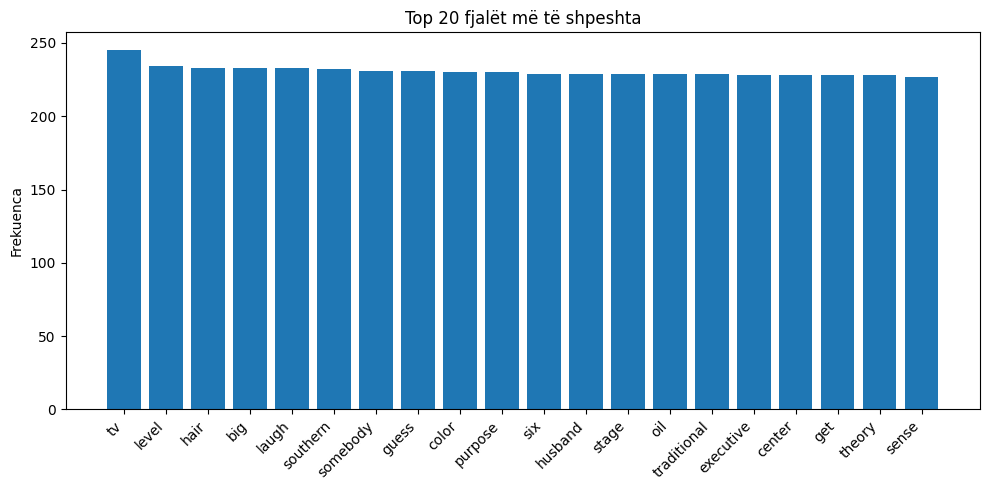

In [14]:
import matplotlib.pyplot as plt

words, counts = zip(*top_20)
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 fjalët më të shpeshta")
plt.ylabel("Frekuenca")
plt.tight_layout()
plt.show()


In [31]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])


0

In [48]:
import seaborn as sns

# zgjedh kolonat numerike (përveç label-it)
numeric_cols = df.select_dtypes(include="number").columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "label"]

# krijo një DataFrame vetëm me kolonat numerike + label
corr_df = df[numeric_cols + ["label"]]

# llogarit matricën e korrelacionit
corr_matrix = corr_df.corr()

# shfaq korrelacionet e secilës variabel me targetin 'label'
print("Korrelacioni me variablën target (label):")
print(corr_matrix["label"].sort_values(ascending=False))


Korrelacioni me variablën target (label):
label                   1.000000
sentence_count          0.029760
character_count         0.028696
word_count              0.027279
punctuation_ratio       0.016104
sentiment_score         0.013429
avg_word_length         0.012896
passive_voice_ratio     0.007842
gunning_fog_index       0.004196
flesch_reading_ease    -0.000029
grammar_errors         -0.010128
avg_sentence_length    -0.029052
predictability_score   -0.037347
lexical_diversity      -0.038270
burstiness             -0.077253
Name: label, dtype: float64


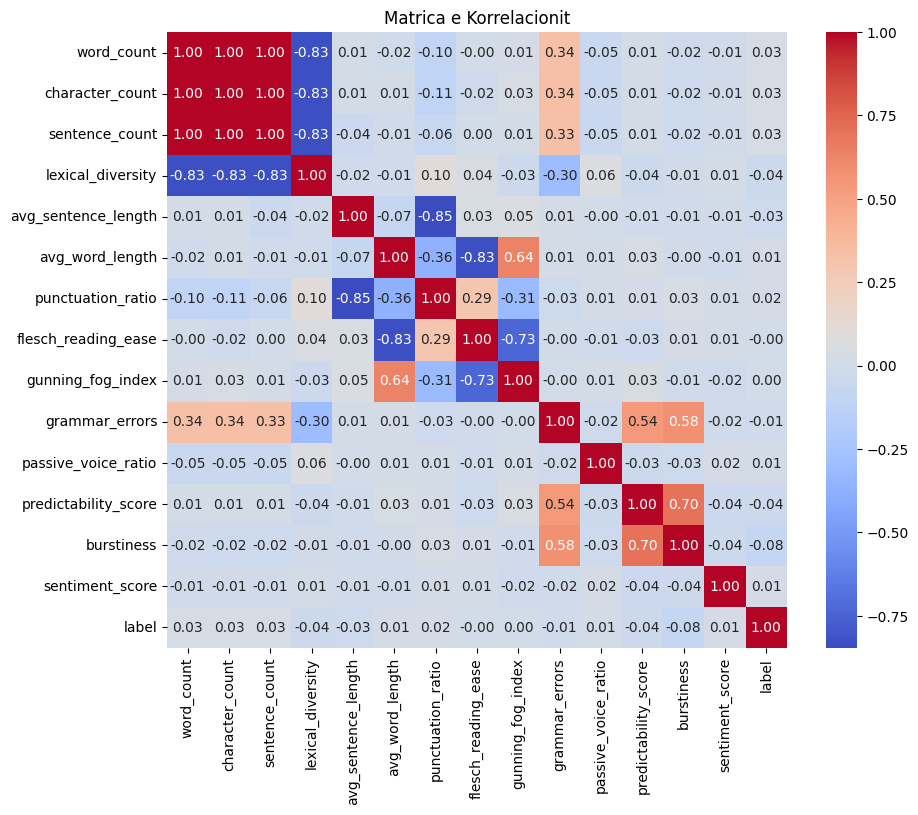

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrica e Korrelacionit")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_20184\172660116.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_label.values, y=corr_with_label.index, palette="coolwarm")


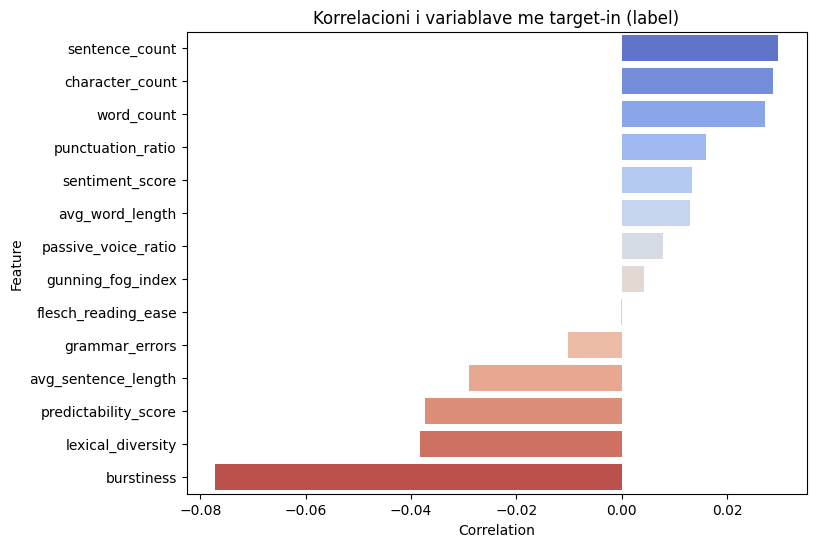

sentence_count          0.029760
character_count         0.028696
word_count              0.027279
punctuation_ratio       0.016104
sentiment_score         0.013429
avg_word_length         0.012896
passive_voice_ratio     0.007842
gunning_fog_index       0.004196
flesch_reading_ease    -0.000029
grammar_errors         -0.010128
avg_sentence_length    -0.029052
predictability_score   -0.037347
lexical_diversity      -0.038270
burstiness             -0.077253
Name: label, dtype: float64


In [34]:
# Korrelacioni i secilës variabel të pavarur me label
corr_with_label = corr_matrix["label"].drop("label").sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_label.values, y=corr_with_label.index, palette="coolwarm")
plt.title("Korrelacioni i variablave me target-in (label)")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

print(corr_with_label)


Numri i mostrave për kategori:
label
0    684
1    683
Name: count, dtype: int64

Përqindja e mostrave për kategori:
label
0    50.036576
1    49.963424
Name: count, dtype: float64


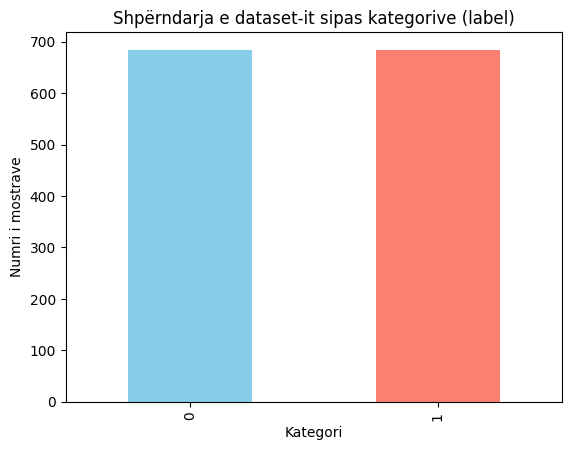

In [35]:
import matplotlib.pyplot as plt

# Numëro sa shembuj ka për secilën kategori
label_counts = df["label"].value_counts()

print("Numri i mostrave për kategori:")
print(label_counts)

# Përqindjet
print("\nPërqindja e mostrave për kategori:")
print(label_counts / len(df) * 100)

# Vizualizim me bar chart
label_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Shpërndarja e dataset-it sipas kategorive (label)")
plt.xlabel("Kategori")
plt.ylabel("Numri i mostrave")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]   # tekstet e pastruara
y = df["label"]        # target

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))


Train samples: 1093
Test samples: 274


In [49]:
print("\nDistribuimi në train:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribuimi në test:")
print(y_test.value_counts(normalize=True) * 100)



Distribuimi në train:
label
0    50.045746
1    49.954254
Name: proportion, dtype: float64

Distribuimi në test:
label
0    50.0
1    50.0
Name: proportion, dtype: float64


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # deri 5000 fjalë më të shpeshta
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Forma e train:", X_train_vec.shape)
print("Forma e test:", X_test_vec.shape)


Forma e train: (1093, 869)
Forma e test: (274, 869)


In [51]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression me balancim klasash
clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(X_train_vec, y_train)

print("✅ Modeli Logistic Regression u trajnua")


✅ Modeli Logistic Regression u trajnua


Accuracy (Balanced LR): 0.5328

Raporti i plotë:
               precision    recall  f1-score   support

           0       0.54      0.49      0.51       137
           1       0.53      0.58      0.55       137

    accuracy                           0.53       274
   macro avg       0.53      0.53      0.53       274
weighted avg       0.53      0.53      0.53       274



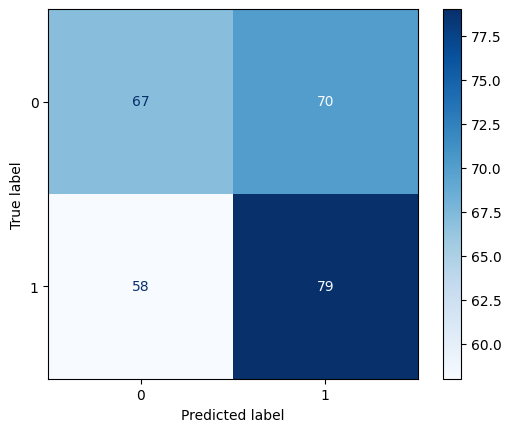

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression me class_weight="balanced"
clf_bal = LogisticRegression(max_iter=1000, class_weight="balanced")
clf_bal.fit(X_train_vec, y_train)

# Parashikimet
y_pred_bal = clf_bal.predict(X_test_vec)

# Vlerësimi
print("Accuracy (Balanced LR):", round(accuracy_score(y_test, y_pred_bal), 4))
print("\nRaporti i plotë:\n", classification_report(y_test, y_pred_bal))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_bal)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_bal.classes_)
disp.plot(cmap="Blues")
plt.show()


Accuracy (Naive Bayes): 0.5328

Raporti i plotë:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52       137
           1       0.53      0.57      0.55       137

    accuracy                           0.53       274
   macro avg       0.53      0.53      0.53       274
weighted avg       0.53      0.53      0.53       274



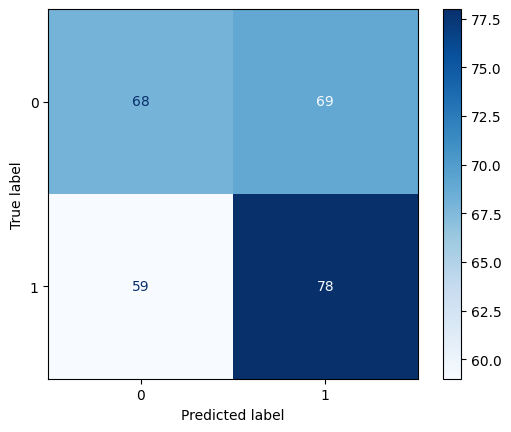

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Trajno modelin Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Parashikimet
y_pred_nb = nb.predict(X_test_vec)

# Vlerësimi
print("Accuracy (Naive Bayes):", round(accuracy_score(y_test, y_pred_nb), 4))
print("\nRaporti i plotë:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap="Blues")
plt.show()



LinearSVC Accuracy: 0.5365

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.52       137
           1       0.53      0.56      0.55       137

    accuracy                           0.54       274
   macro avg       0.54      0.54      0.54       274
weighted avg       0.54      0.54      0.54       274



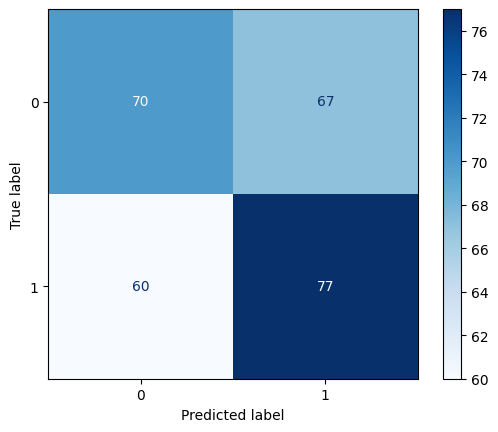

In [55]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Trajno SVM
svm = LinearSVC(class_weight="balanced", random_state=42)
svm.fit(X_train_vec, y_train)

# Parashikimet
y_pred_svm = svm.predict(X_test_vec)

# Vlerësimi
print("LinearSVC Accuracy:", round(accuracy_score(y_test, y_pred_svm), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap="Blues")
plt.show()


Random Forest Accuracy: 0.5328

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52       137
           1       0.53      0.57      0.55       137

    accuracy                           0.53       274
   macro avg       0.53      0.53      0.53       274
weighted avg       0.53      0.53      0.53       274



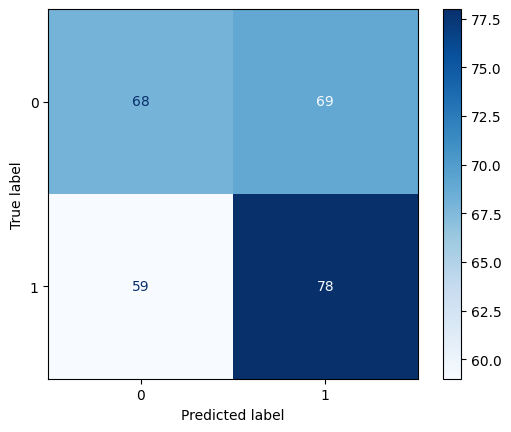

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Trajno Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_vec, y_train)

# Parashikimet
y_pred_rf = rf.predict(X_test_vec)

# Vlerësimi
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.show()


📊 Rezultatet e modeleve:

                            Model  Accuracy  Precision  Recall  F1-score
0  Logistic Regression (balanced)    0.5328     0.5302  0.5766    0.5524
1                     Naive Bayes    0.5328     0.5306  0.5693    0.5493
2                   Random Forest    0.5328     0.5306  0.5693    0.5493
3                       LinearSVC    0.5365     0.5347  0.5620    0.5480

✅ Modeli më i mirë sipas F1-score është: Logistic Regression (balanced)


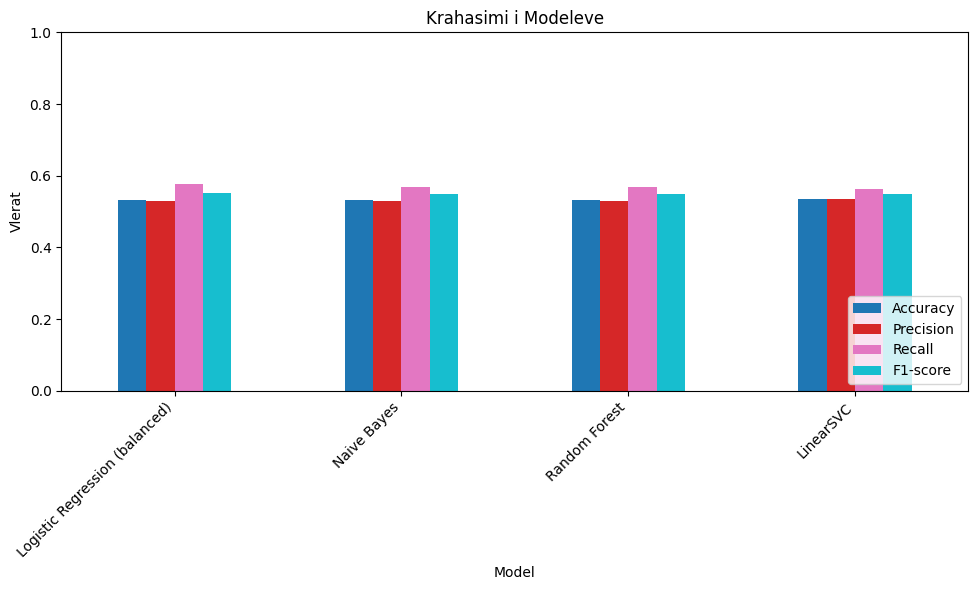

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

def add_result(name, y_pred):
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-score": round(f1, 4)
    })

# përdor parashikimet e ruajtura më lart
add_result("Logistic Regression (balanced)", y_pred_bal)
add_result("Naive Bayes", y_pred_nb)
add_result("LinearSVC", y_pred_svm)
add_result("Random Forest", y_pred_rf)

# krijo tabelën me rezultatet
df_results = pd.DataFrame(results).sort_values("F1-score", ascending=False).reset_index(drop=True)

print("📊 Rezultatet e modeleve:\n")
print(df_results)

# shfaq modelin më të mirë sipas F1-score
best_model = df_results.loc[0, "Model"]
print(f"\n✅ Modeli më i mirë sipas F1-score është: {best_model}")

# Vizualizim i metrikeve
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar", figsize=(10,6), colormap="tab10"
)
plt.title("Krahasimi i Modeleve")
plt.ylabel("Vlerat")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [60]:
def predict_sentence(text: str, model=model, vectorizer=vectorizer):
    """
    Merr një fjali/tekst dhe kthen parashikimin e modelit (label).
    Kthen edhe probabilitetet nëse modeli i ekspozon (p.sh. LR, NB).
    """
    if not isinstance(text, str) or text.strip() == "":
        return {"error": "Ju lutem jepni një tekst jo-bosh."}

    # bëj clean të tekstit si gjatë trainimit
    text_clean = clean_text(text)

    # transformo tekstin si në train
    X_vec = vectorizer.transform([text_clean])

    # parashikimi
    pred = model.predict(X_vec)[0]

    # probabilitetet (nëse suportohen)
    proba = None
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_vec)[0]
        if hasattr(model, "classes_"):
            proba = {int(c): float(p) for c, p in zip(model.classes_, probs)}

    return {
        "input": text,
        "prediction": int(pred) if hasattr(pred, "item") else int(pred),
        "proba": proba
    }


In [61]:
for s in samples:
    result = predict_sentence(s)
    print(f"Input: {result['input']}")
    print(f"Prediction: {result['prediction']}")
    if result['proba']:
        print(f"Probabilities: {result['proba']}")
    print("-" * 40)


Input: This article provides a detailed statistical analysis with references and formal tone.
Prediction: 0
Probabilities: {0: 0.6801037724726542, 1: 0.3198962275273458}
----------------------------------------
Input: Haha this is wild, I just wrote this in two seconds lol
Prediction: 1
Probabilities: {0: 0.4121059515164194, 1: 0.5878940484835806}
----------------------------------------
Input: In this study, we explore the effects of temperature on reaction rates.
Prediction: 0
Probabilities: {0: 0.6232468220690666, 1: 0.37675317793093344}
----------------------------------------


In [63]:
import joblib

# Zgjedh modelin fitues (nga krahasimi, Logistic Regression balanced)
best_model = clf_bal  

# Ruaj modelin dhe vectorizer-in
joblib.dump(best_model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ U ruajtën: model.pkl dhe vectorizer.pkl (modeli fitues)")


✅ U ruajtën: model.pkl dhe vectorizer.pkl (modeli fitues)


In [64]:
import joblib

# Ringarko modelin dhe vectorizer-in
loaded_model = joblib.load("model.pkl")
loaded_vectorizer = joblib.load("vectorizer.pkl")

# Shembuj testues
tests = [
    "Write a short creative story about a dragon.",
    "This research discusses the correlation between data science and statistics.",
    "LOL this was written super quick!"
]

for t in tests:
    result = predict_sentence(t, model=loaded_model, vectorizer=loaded_vectorizer)
    print(result)
    print("-" * 40)



{'input': 'Write a short creative story about a dragon.', 'prediction': 1, 'proba': {0: 0.40826757036245076, 1: 0.5917324296375492}}
----------------------------------------
{'input': 'This research discusses the correlation between data science and statistics.', 'prediction': 1, 'proba': {0: 0.48860448964632985, 1: 0.5113955103536701}}
----------------------------------------
{'input': 'LOL this was written super quick!', 'prediction': 0, 'proba': {0: 0.5214043473671752, 1: 0.4785956526328247}}
----------------------------------------
